In [4]:
import sympy
import matplotlib
import numpy
import scipy
import scipy.integrate as integrate
import math
import pandas

In [5]:
def rho(j, t, eta):
    return numpy.exp(-scipy.special.binom(int(j), 2)*integrate.quad(eta, 0, t, limit=100)[0])

def comb_term(j, k, n):
    assert j >= k, "invalid integers"
    return ((-1)**(j-k)*(2*j - 1)*numpy.prod(list(range(k, k + j -1)))*
            numpy.prod(list(range(n, n - j, -1)))/
            (math.factorial(k)*math.factorial(j - k)*
             numpy.prod(list(range(n, n + j)))))

def P_Ant(k, t, n, eta):
    result = 0
    for jj in range(k, n + 1):
        result += (rho(jj, t, eta)*
                   comb_term(jj, k , n))
    return result

def ETj(k, n, eta):
    PP = lambda t: P_Ant(k, t, n, eta)
    return integrate.quad(PP, 0, scipy.inf, limit=100)

In [6]:
def tennessen_traj_eu(t):
    assert t >= 0, "invalid time"
    t = -t +  0.4049248
    if t < 0:
        return 1.
    elif t >= 0 and t < 0.2654:
        return 1.98**-1
    elif t >= 0.2654 and t < 0.342:
        return 0.2545828**-1
    elif t >= 0.342 and t < 0.391:
        return ((1032*numpy.exp(44.95426*(t-0.3419973)))/7310)**-1
    elif t >= 0.391:
        return ((9300*numpy.exp(285.8609*(t-0.3909029)))/7310)**-1

def tennessen_traj_af(t):
    assert t >= 0, "invalid time"
    t = -t +  0.4049248
    if t < 0:
        return 1.
    elif t >= 0 and t < 0.391:
        return 1.98**-1
    elif t >= 0.391:
        return ((14474*numpy.exp(240.8648*(t-0.3909029)))/7310)**-1

In [7]:
t_range = numpy.arange(0.0, 1.0, .001)
n_test_eu = [tennessen_traj_eu(t) for t in t_range]
n_test_af = [tennessen_traj_af(t) for t in t_range]

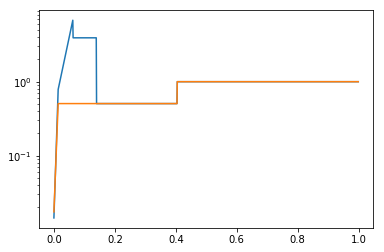

In [8]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(t_range, n_test_eu)
plt.plot(t_range, n_test_af)
plt.yscale('log')
plt.show()

In [9]:
ET4_4_af = ETj(4, 4, tennessen_traj_af)[0]
ET3_4_af = ETj(3, 4, tennessen_traj_af)[0]
ET2_4_af = ETj(2, 4, tennessen_traj_af)[0]
ET2_2_af = ETj(2, 2, tennessen_traj_af)[0]

ET4_4_eu = ETj(4, 4, tennessen_traj_eu)[0]
ET3_4_eu = ETj(3, 4, tennessen_traj_eu)[0]
ET2_4_eu = ETj(2, 4, tennessen_traj_eu)[0]
ET2_2_eu = ETj(2, 2, tennessen_traj_eu)[0]

ET4_4_c = ETj(4, 4, foo)[0]
ET3_4_c = ETj(3, 4, foo)[0]
ET2_4_c = ETj(2, 4, foo)[0]
ET2_2_c = ETj(2, 2, foo)[0]

/usr/local/lib/python3.5/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [10]:
Q_af = 2*(ET4_4_af + (1/3.)*ET3_4_af + (2/9.)*ET2_4_af)/ET2_2_af
Q_eu = 2*(ET4_4_eu + (1/3.)*ET3_4_eu + (2/9.)*ET2_4_eu)/ET2_2_eu
Q_c = 2*(ET4_4_c + (1/3.)*ET3_4_c + (2/9.)*ET2_4_c)/ET2_2_c
print(Q_af)
print(Q_eu)
print(Q_c)

1.0937644730053369
0.9207397073756128
0.9999999999999882


In [11]:
kappa = 6 # laplace dist kurtosis
theta = 1.2*10**-8*7310
l_set = numpy.arange(6000, 100000, 100)
ET2_eu_set = [l*theta*ET2_2_eu*2 for l in l_set]

In [12]:
ekurt_af = [1 + kappa/(6*l*theta*ET2_2_af)*Q_af for l in l_set]
ekurt_eu = [1 + kappa/(6*l*theta*ET2_2_eu)*Q_eu for l in l_set]
ekurt_af_c = [1 + kappa/(6*l*theta*ET2_2_af)*1. for l in l_set]
ekurt_eu_c = [1 + kappa/(6*l*theta*ET2_2_eu)*1. for l in l_set]

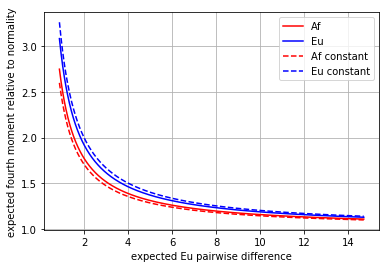

In [13]:
f = plt.figure(2)
plt.plot(ET2_eu_set, ekurt_af, "r", label="Af")
plt.plot(ET2_eu_set, ekurt_eu, "b", label="Eu")
plt.plot(ET2_eu_set, ekurt_af_c, "r--", label="Af constant")
plt.plot(ET2_eu_set, ekurt_eu_c, "b--", label="Eu constant")
plt.xlabel("expected Eu pairwise difference")
plt.ylabel("expected fourth moment relative to normality")
plt.grid(True)
plt.legend()
plt.show()
f.savefig("af_eu_kurt.pdf", bbox_inches="tight")

In [18]:
lambda_set = numpy.arange(0, .005, .00001)
N0 = 10000
ET2_2_set = []
ET2_4_set = []
ET3_4_set = []
ET4_4_set = []
for lam in lambda_set:
    c_rate_fun = lambda t: numpy.exp(lam*N0*t)#*N0**-1.
    ET2_2_set.append(ETj(2, 2, c_rate_fun)[0])
    ET2_4_set.append(ETj(2, 4, c_rate_fun)[0])
    ET3_4_set.append(ETj(3, 4, c_rate_fun)[0])
    ET4_4_set.append(ETj(4, 4, c_rate_fun)[0])

/home/evankoch/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


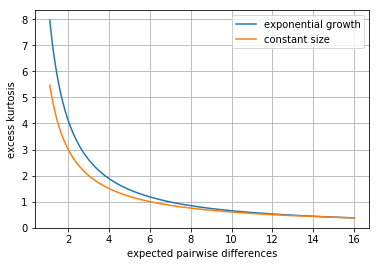

In [19]:
coal_times = pandas.DataFrame({"lam": lambda_set, "ET2_2": ET2_2_set, "ET2_4": ET2_4_set,
                               "ET3_4": ET3_4_set, "ET4_4": ET4_4_set})
coal_times["Q"] = (coal_times["ET4_4"] + (1/3.)*coal_times["ET3_4"] +
                   (2/9.)*coal_times["ET2_4"])/coal_times["ET2_2"]
coal_times["ex_kurt"] = coal_times["Q"]*kappa/(coal_times["ET2_2"]*.0008*N0)
coal_times["ex_kurt_const"] = (0.5)*kappa/(coal_times["ET2_2"]*.0008*N0)
coal_times["ex_diffs"] = coal_times["ET2_2"]*.0008*2*N0

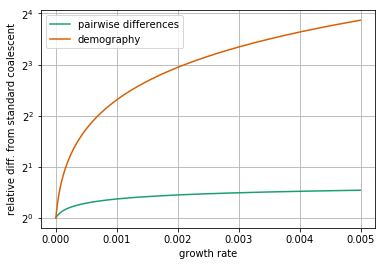

In [20]:
foo_4 = plt.figure(8)
plt.plot(coal_times["lam"], coal_times["Q"]/coal_times["Q"][0], label="pairwise differences", color="#1b9e77")
plt.plot(coal_times["lam"], coal_times["ET2_2"][0]/coal_times["ET2_2"], label="demography", color="#d95f02")
plt.yscale('log', basey=2)
plt.grid(True)
plt.legend()
plt.xlabel("growth rate")
plt.ylabel("relative diff. from standard coalescent")
plt.show()
foo_4.savefig("diff_demo_contributions.pdf", bbox_inches="tight")

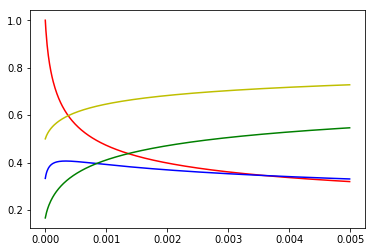

In [21]:
plt.figure("foo")
plt.plot(coal_times["lam"], coal_times["ET2_4"]/coal_times["ET2_2"], "r")
plt.plot(coal_times["lam"], coal_times["ET3_4"]/coal_times["ET2_2"], "b")
plt.plot(coal_times["lam"], coal_times["ET4_4"]/coal_times["ET2_2"], "g")
plt.plot(coal_times["lam"], coal_times["Q"], "y")
plt.show()

In [ ]:
lambda_set_alt = numpy.arange(0, 1, .001)*.1
N0_alt = 1000
ET2_2_set_alt = []
ET2_4_set_alt = []
ET3_4_set_alt = []
ET4_4_set_alt = []
for lam in lambda_set_alt:
    c_rate_fun = lambda t: numpy.exp(lam*N0_alt*t)
    ET2_2_set_alt.append(ETj(2, 2, c_rate_fun)[0])
    ET2_4_set_alt.append(ETj(2, 4, c_rate_fun)[0])
    ET3_4_set_alt.append(ETj(3, 4, c_rate_fun)[0])
    ET4_4_set_alt.append(ETj(4, 4, c_rate_fun)[0])

/home/evankoch/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


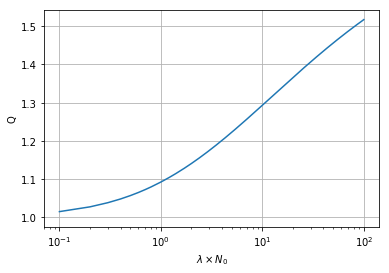

In [27]:
coal_times_alt = pandas.DataFrame({"lam": lambda_set_alt, "ET2_2": ET2_2_set_alt, "ET2_4": ET2_4_set_alt,
                               "ET3_4": ET3_4_set_alt, "ET4_4": ET4_4_set_alt})
coal_times_alt["Q"] = 2*(coal_times_alt["ET4_4"] + (1/3.)*coal_times_alt["ET3_4"] +
                   (2/9.)*coal_times_alt["ET2_4"])/coal_times_alt["ET2_2"]

foo5 = plt.figure(5)
plt.plot(coal_times_alt["lam"]*N0_alt, coal_times_alt["Q"])
plt.grid(True)
plt.xscale("log")
plt.xlabel(r"$\lambda \times N_0$")
plt.ylabel("Q")
plt.show()
foo5.savefig("exp_growth.pdf", bbox_inches="tight")